In [2]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [3]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [4]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
conv_base.trainable = False

In [8]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/diagnosis-of-diabetic-retinopathy/Diagnosis of Diabetic Retinopathy/train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/diagnosis-of-diabetic-retinopathy/Diagnosis of Diabetic Retinopathy/valid',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(150,150)
)
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/diagnosis-of-diabetic-retinopathy/Diagnosis of Diabetic Retinopathy/test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(150,150)
)

Found 2076 files belonging to 2 classes.
Found 531 files belonging to 2 classes.
Found 231 files belonging to 2 classes.


In [9]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


I0000 00:00:1727335785.689956    2808 service.cc:145] XLA service 0x7f9c6c01feb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727335785.690016    2808 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727335785.690026    2808 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 3/65 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.6042 - loss: 1.3441 

I0000 00:00:1727335794.699008    2808 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


65/65 ━━━━━━━━━━━━━━━━━━━━ 30s 302ms/step - accuracy: 0.8241 - loss: 0.5978 - val_accuracy: 0.9266 - val_loss: 0.1838
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.9299 - loss: 0.1843 - val_accuracy: 0.9379 - val_loss: 0.1778
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9357 - loss: 0.1683 - val_accuracy: 0.9360 - val_loss: 0.1628
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9457 - loss: 0.1482 - val_accuracy: 0.9435 - val_loss: 0.1892
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9545 - loss: 0.1370 - val_accuracy: 0.8964 - val_loss: 0.2479
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.9453 - loss: 0.1460 - val_accuracy: 0.9360 - val_loss: 0.1545
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.9475 - loss: 0.1481 - val_accuracy: 0.9435 - val_loss: 0.1561
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.9639 - loss: 0.1104 - val_accuracy: 0.9322 - val_loss: 

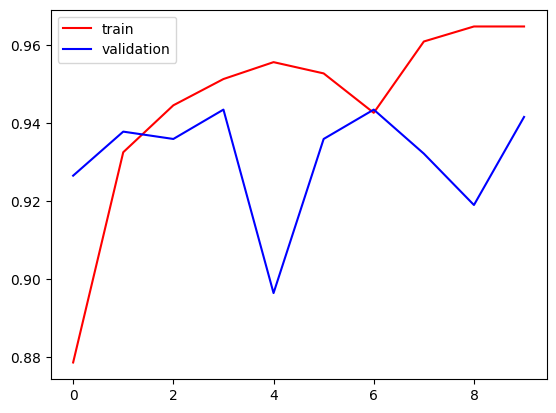

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

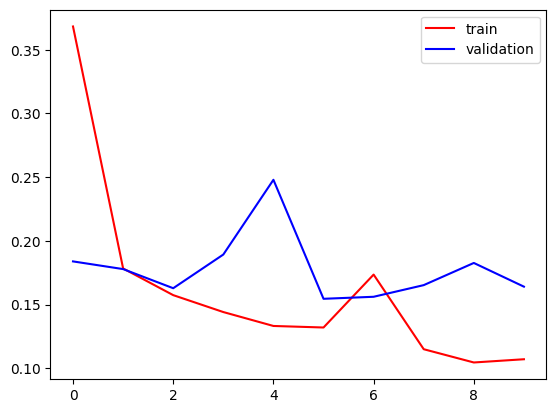

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
train_loss,train_accuracy = model.evaluate(train_ds)
train_loss,train_accuracy = model.evaluate(validation_ds)
train_loss,train_accuracy = model.evaluate(test_ds)

65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.9690 - loss: 0.0918
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9383 - loss: 0.1654
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 460ms/step - accuracy: 0.7756 - loss: 19.9399


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Step 1: Get predictions and true labels from the validation dataset
predictions = model.predict(test_ds)
# Convert softmax outputs to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Extract true labels from the validation dataset
true_labels = np.concatenate([y for x, y in validation_ds], axis=0)

# Step 2: Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

# Step 3: Generate classification report
# Assuming the dataset has class names stored in the validation set
class_names = test_ds.class_names  # Extract class names directly from the dataset object
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("\nClassification Report:")
print(class_report)

# Optionally: Visualize the confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


ValueError: Found input variables with inconsistent numbers of samples: [531, 231]

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Step 1: Get predictions and true labels
predictions = model.predict(validation_ds)

# Convert softmax outputs to class labels for multi-class case
predicted_labels = np.argmax(predictions, axis=1)

# Extract true labels from the validation dataset
true_labels = np.concatenate([y for x, y in validation_ds], axis=0)

# Check for matching lengths
print(f"Length of true labels: {len(true_labels)}")
print(f"Length of predicted labels: {len(predicted_labels)}")

# If lengths do not match, trim the longer one to match
min_length = min(len(true_labels), len(predicted_labels))
true_labels = true_labels[:min_length]
predicted_labels = predicted_labels[:min_length]

# Step 2: Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

# Step 3: Generate classification report
class_names = validation_ds.class_names  # Automatically extract class names from the dataset
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("\nClassification Report:")
print(class_report)

# Step 4: Visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
Length of true labels: 531
Length of predicted labels: 531


ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets